## <center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 3
Авторы материала: Илья Барышников (@lucidyan), Максим Уваров (@maxis42). Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Домашнее задание №2
## <center> Визуальный анализ данных о сердечно-сосудистых заболеваниях

**В задании предлагается с помощью визуального анализа ответить на несколько вопросов по данным о сердечно-сосудистых заболеваниях. Данные использовались в соревновании [ML Boot Camp 5](http://mlbootcamp.ru/round/12/sandbox/) (качать их не надо, они уже есть в репозитории).**

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1WBYEAYlgOhqAJyh_e3udmBWpBbkpyFSrFCMlWAoRFTY/edit). Код отправлять никуда не нужно.**

В соревновании предлагалось определить наличие/отсутствие сердечно-сосудистых заболеваний (ССЗ) по результатам осмотра пациента.

**Описание данных.**

Датасет сформирован из реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

Объективные признаки:

 - Возраст (age)
 - Рост (height)
 - Вес (weight)
 - Пол (gender)
 

Результаты измерения:

 - Артериальное давление верхнее и нижнее (ap_hi, ap_lo)
 - Холестерин (cholesterol)
 - Глюкоза (gluc)
 

Субъективные признаки (со слов пациентов):

 - Курение (smoke)
 - Употребление алкоголя (alco)
 - Физическая активность (active)
 
Целевой признак (который интересно будет прогнозировать):
 - Наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра (cardio)

Возраст дан в днях. Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра.

In [2]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np

# игнорируем warnings
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# настройка внешнего вида графиков в seaborn
sns.set_context(
    "notebook", 
    font_scale = 1.5,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

---

В рамках задания для простоты будем работать только с обучающей выборкой. Чистить данные от выбросов и ошибок в данных НЕ нужно, кроме тех случаев, где об этом явно указано.
<br>
<br>
Все визуализации рекомендуем производить с помощью библиотеки `Seaborn`.

# Проведем небольшой EDA

In [10]:
train = pd.read_csv('../../data/mlbootcamp5_train.csv', sep=';',
                    index_col='id')

In [5]:
print('Размер датасета: ', train.shape)
train.head()

Размер датасета:  (70000, 12)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Для начала всегда неплохо бы посмотреть на значения, которые принимают переменные.

Переведем данные в "Long Format"-представление и отрисуем с помощью [factorplot](https://seaborn.pydata.org/generated/seaborn.factorplot.html) количество значений, которые принимают категориальные переменные.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html

In [172]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active', 'cardio'])
train_uniques

,variable,value
0,gender,2
1,gender,1
2,gender,1
3,gender,2
4,gender,1
5,gender,1
6,gender,1
7,gender,2
8,gender,1
9,gender,1


In [105]:
train_uniques_origin = train_uniques

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html

https://pandas.pydata.org/pandas-docs/stable/groupby.html

https://pandas.pydata.org/pandas-docs/stable/api.html#groupby

In [57]:
train_uniques.groupby(['variable', 'value'])

Групбай по паре 'variable', 'value'

In [70]:
grouped = train_uniques.groupby(['variable', 'value'])

In [82]:
grouped.describe()

count                                                   \
                  count     mean std      min      25%      50%      75%   
variable    value                                                          
active      0       1.0  13739.0 NaN  13739.0  13739.0  13739.0  13739.0   
            1       1.0  56261.0 NaN  56261.0  56261.0  56261.0  56261.0   
alco        0       1.0  66236.0 NaN  66236.0  66236.0  66236.0  66236.0   
            1       1.0   3764.0 NaN   3764.0   3764.0   3764.0   3764.0   
cardio      0       1.0  35021.0 NaN  35021.0  35021.0  35021.0  35021.0   
            1       1.0  34979.0 NaN  34979.0  34979.0  34979.0  34979.0   
cholesterol 1       1.0  52385.0 NaN  52385.0  52385.0  52385.0  52385.0   
            2       1.0   9549.0 NaN   9549.0   9549.0   9549.0   9549.0   
            3       1.0   8066.0 NaN   8066.0   8066.0   8066.0   8066.0   
gender      1       1.0  45530.0 NaN  45530.0  45530.0  45530.0  45530.0   
            2       1.0  24470.0 NaN  24470.0  24470.0  24470.0  24470.0   
gluc        1       1.0  59479.0 NaN  59479.0  59479.0  59479.0  59479.0   
            2       1.0   5190.0 NaN   5190.0   5190.0   5190.0   5190.0   
            3       1.0   5331.0 NaN   5331.0   5331.0   5331.0   5331.0   
smoke       0       1.0  63831.0 NaN  63831.0  63831.0  63831.0  63831.0   
            1       1.0   6169.0 NaN   6169.0   6169.0   6169.0   6169.0   

                            
                       max  
variable    value           
active      0      13739.0  
            1      56261.0  
alco        0      66236.0  
            1       3764.0  
cardio      0      35021.0  
            1      34979.0  
cholesterol 1      52385.0  
            2       9549.0  
            3       8066.0  
gender      1      45530.0  
            2      24470.0  
gluc        1      59479.0  
            2       5190.0  
            3       5331.0  
smoke       0      63831.0  
            1       6169.0

In [83]:
grouped.all()

count
variable    value       
active      0       True
            1       True
alco        0       True
            1       True
cardio      0       True
            1       True
cholesterol 1       True
            2       True
            3       True
gender      1       True
            2       True
gluc        1       True
            2       True
            3       True
smoke       0       True
            1       True

In [84]:
train_uniques.groupby(['variable']).describe()

count                                                         \
            count          mean           std      min      25%      50%   
variable                                                                   
active        2.0  35000.000000  30067.594550  13739.0  24369.5  35000.0   
alco          2.0  35000.000000  44174.374834   3764.0  19382.0  35000.0   
cardio        2.0  35000.000000     29.698485  34979.0  34989.5  35000.0   
cholesterol   3.0  23333.333333  25170.405724   8066.0   8807.5   9549.0   
gender        2.0  35000.000000  14891.668812  24470.0  29735.0  35000.0   
gluc          3.0  23333.333333  31303.144959   5190.0   5260.5   5331.0   
smoke         2.0  35000.000000  40773.191217   6169.0  20584.5  35000.0   

                              value                                            
                 75%      max count mean       std  min   25%  50%   75%  max  
variable                                                                       
active       45630.5  56261.0   2.0  0.5  0.707107  0.0  0.25  0.5  0.75  1.0  
alco         50618.0  66236.0   2.0  0.5  0.707107  0.0  0.25  0.5  0.75  1.0  
cardio       35010.5  35021.0   2.0  0.5  0.707107  0.0  0.25  0.5  0.75  1.0  
cholesterol  30967.0  52385.0   3.0  2.0  1.000000  1.0  1.50  2.0  2.50  3.0  
gender       40265.0  45530.0   2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0  
gluc         32405.0  59479.0   3.0  2.0  1.000000  1.0  1.50  2.0  2.50  3.0  
smoke        49415.5  63831.0   2.0  0.5  0.707107  0.0  0.25  0.5  0.75  1.0

In [85]:
train_uniques.groupby(['value']).describe()

count                                                                    \
      count          mean           std      min       25%      50%       75%   
value                                                                           
0       4.0  44706.750000  25047.028012  13739.0  29700.50  49426.0  64432.25   
1       7.0  36938.142857  23255.789963   3764.0  20574.00  45530.0  54323.00   
2       3.0  13069.666667  10110.683475   5190.0   7369.50   9549.0  17009.50   
3       2.0   6698.500000   1933.937047   5331.0   6014.75   6698.5   7382.25   

                
           max  
value           
0      66236.0  
1      59479.0  
2      24470.0  
3       8066.0

In [63]:
train_uniques.groupby(['variable', 'value']).count()

count
variable    value       
active      0          1
            1          1
alco        0          1
            1          1
cardio      0          1
            1          1
cholesterol 1          1
            2          1
            3          1
gender      1          1
            2          1
gluc        1          1
            2          1
            3          1
smoke       0          1
            1          1

In [58]:
train_uniques.groupby(['variable', 'value']).keys

['variable', 'value']

In [89]:
train_uniques.groupby(['variable', 'value'])['variable']

In [90]:
train_uniques.groupby(['variable', 'value'])['variable'].count()

variable     value
active       0        1
             1        1
alco         0        1
             1        1
cardio       0        1
             1        1
cholesterol  1        1
             2        1
             3        1
gender       1        1
             2        1
gluc         1        1
             2        1
             3        1
smoke        0        1
             1        1
Name: variable, dtype: int64

In [87]:
train_uniques.groupby(['variable', 'value']).count()

count
variable    value       
active      0          1
            1          1
alco        0          1
            1          1
cardio      0          1
            1          1
cholesterol 1          1
            2          1
            3          1
gender      1          1
            2          1
gluc        1          1
            2          1
            3          1
smoke       0          1
            1          1

In [61]:
train_uniques.groupby(['variable', 'value'])['value']

In [62]:
train_uniques.groupby(['variable', 'value'])['value'].count()

variable     value
active       0        1
             1        1
alco         0        1
             1        1
cardio       0        1
             1        1
cholesterol  1        1
             2        1
             3        1
gender       1        1
             2        1
gluc         1        1
             2        1
             3        1
smoke        0        1
             1        1
Name: value, dtype: int64

In [92]:
train_uniques.groupby(['variable', 'value'])['value'].count().sort_index(level=[0])
#0 - это variable
#1 - это value
#sort_index(level=[0, 1]) означает сортировку вначале по variable а затем по value

variable     value
active       0        1
             1        1
alco         0        1
             1        1
cardio       0        1
             1        1
cholesterol  1        1
             2        1
             3        1
gender       1        1
             2        1
gluc         1        1
             2        1
             3        1
smoke        0        1
             1        1
Name: value, dtype: int64

In [44]:
train_uniques.groupby(['variable', 'value'])['value'].count()

variable     value
active       0        1
             1        1
alco         0        1
             1        1
cardio       0        1
             1        1
cholesterol  1        1
             2        1
             3        1
gender       1        1
             2        1
gluc         1        1
             2        1
             3        1
smoke        0        1
             1        1
Name: value, dtype: int64

In [42]:
pd.DataFrame(train_uniques.groupby(['variable', 'value'])['value'].count()) \
.sort_index(level=[0, 1]).rename(columns={'value': 'count'}).reset_index()

,variable,value,count
0,active,0,1
1,active,1,1
2,alco,0,1
3,alco,1,1
4,cardio,0,1
5,cardio,1,1
6,cholesterol,1,1
7,cholesterol,2,1
8,cholesterol,3,1
9,gender,1,1


In [50]:
train_uniques.groupby(['variable', 'value'])['value'].count()

variable     value
active       0        1
             1        1
alco         0        1
             1        1
cardio       0        1
             1        1
cholesterol  1        1
             2        1
             3        1
gender       1        1
             2        1
gluc         1        1
             2        1
             3        1
smoke        0        1
             1        1
Name: value, dtype: int64

In [43]:
pd.DataFrame(train_uniques.groupby(['variable', 'value'])['value'].count())

value
variable    value       
active      0          1
            1          1
alco        0          1
            1          1
cardio      0          1
            1          1
cholesterol 1          1
            2          1
            3          1
gender      1          1
            2          1
gluc        1          1
            2          1
            3          1
smoke       0          1
            1          1

In [47]:
pd.DataFrame(train_uniques.groupby(['variable', 'value'])['value'].count()) \
.sort_index(level=[0, 1])

value
variable    value       
active      0          1
            1          1
alco        0          1
            1          1
cardio      0          1
            1          1
cholesterol 1          1
            2          1
            3          1
gender      1          1
            2          1
gluc        1          1
            2          1
            3          1
smoke       0          1
            1          1

In [93]:
pd.DataFrame(train_uniques.groupby(['variable', 'value'])['value'].count()) \
.sort_index(level=[0, 1]).rename(columns={'value': 'count'})

count
variable    value       
active      0          1
            1          1
alco        0          1
            1          1
cardio      0          1
            1          1
cholesterol 1          1
            2          1
            3          1
gender      1          1
            2          1
gluc        1          1
            2          1
            3          1
smoke       0          1
            1          1

In [94]:
pd.DataFrame(train_uniques.groupby(['variable', 'value'])['value'].count()) \
.sort_index(level=[0, 1]).rename(columns={'value': 'count'}).reset_index()

,variable,value,count
0,active,0,1
1,active,1,1
2,alco,0,1
3,alco,1,1
4,cardio,0,1
5,cardio,1,1
6,cholesterol,1,1
7,cholesterol,2,1
8,cholesterol,3,1
9,gender,1,1


In [96]:
pd.DataFrame(train_uniques.groupby(['variable', 'value']).count()) \
.sort_index(level=[0]).rename(columns={'value': 'count'}).reset_index()

,variable,value,count
0,active,0,1
1,active,1,1
2,alco,0,1
3,alco,1,1
4,cardio,0,1
5,cardio,1,1
6,cholesterol,1,1
7,cholesterol,2,1
8,cholesterol,3,1
9,gender,1,1


Как видно, все команды ясны кроме reset_index. Для её понимания надо знать https://pandas.pydata.org/pandas-docs/stable/advanced.html multi-level index

In [39]:
train_uniques

,variable,value,count
0,active,0,13739
1,active,1,56261
2,alco,0,66236
3,alco,1,3764
4,cardio,0,35021
5,cardio,1,34979
6,cholesterol,1,52385
7,cholesterol,2,9549
8,cholesterol,3,8066
9,gender,1,45530


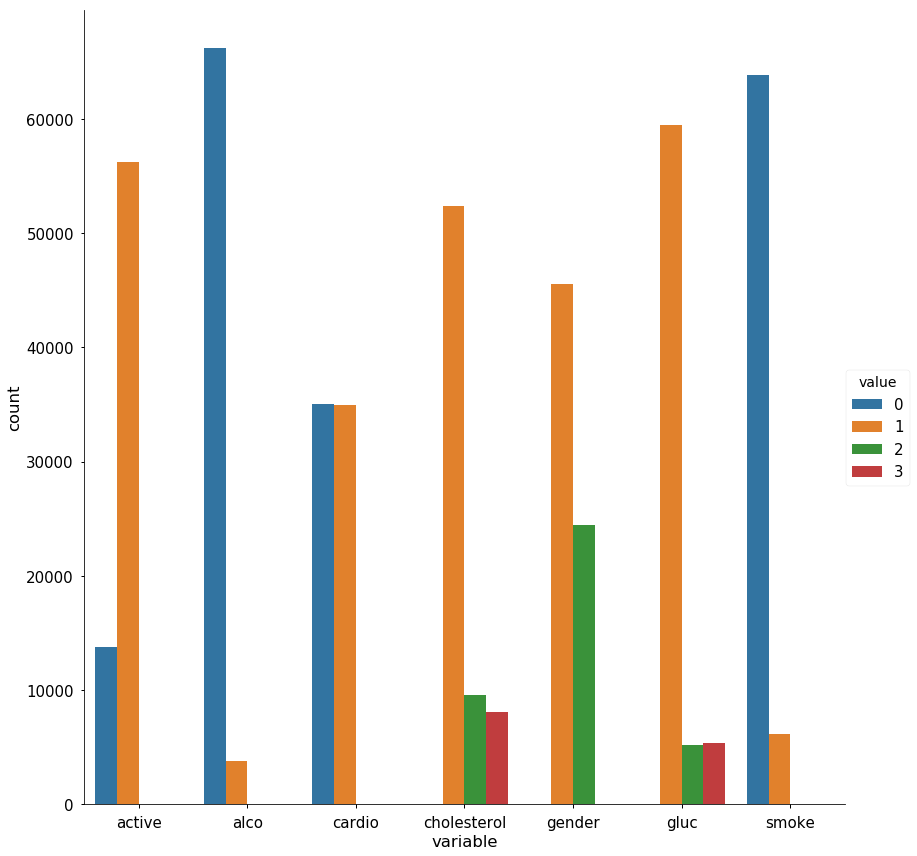

In [141]:
train_uniques = pd.DataFrame(train_uniques_origin.groupby(['variable', 
                                                    'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               data=train_uniques, kind='bar', size=12);

In [116]:
train_uniques_origin.groupby(['variable', 'value']).count()

Empty DataFrame
Columns: []
Index: [(active, 0), (active, 1), (alco, 0), (alco, 1), (cardio, 0), (cardio, 1), (cholesterol, 1), (cholesterol, 2), (cholesterol, 3), (gender, 1), (gender, 2), (gluc, 1), (gluc, 2), (gluc, 3), (smoke, 0), (smoke, 1)]

In [139]:
train_uniques_origin.groupby(['variable', 'value'])['value'].count()

variable     value
active       0        13739
             1        56261
alco         0        66236
             1         3764
cardio       0        35021
             1        34979
cholesterol  1        52385
             2         9549
             3         8066
gender       1        45530
             2        24470
gluc         1        59479
             2         5190
             3         5331
smoke        0        63831
             1         6169
Name: value, dtype: int64

In [134]:
grouped = train_uniques_origin.groupby(['variable', 'value'])

In [138]:
grouped.first()

,
variable,value


In [122]:
pd.DataFrame(train_uniques_origin.groupby(['variable', 
                                                    'value'])['variable'].count())

variable
variable    value          
active      0         13739
            1         56261
alco        0         66236
            1          3764
cardio      0         35021
            1         34979
cholesterol 1         52385
            2          9549
            3          8066
gender      1         45530
            2         24470
gluc        1         59479
            2          5190
            3          5331
smoke       0         63831
            1          6169

In [145]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active', 'cardio'])

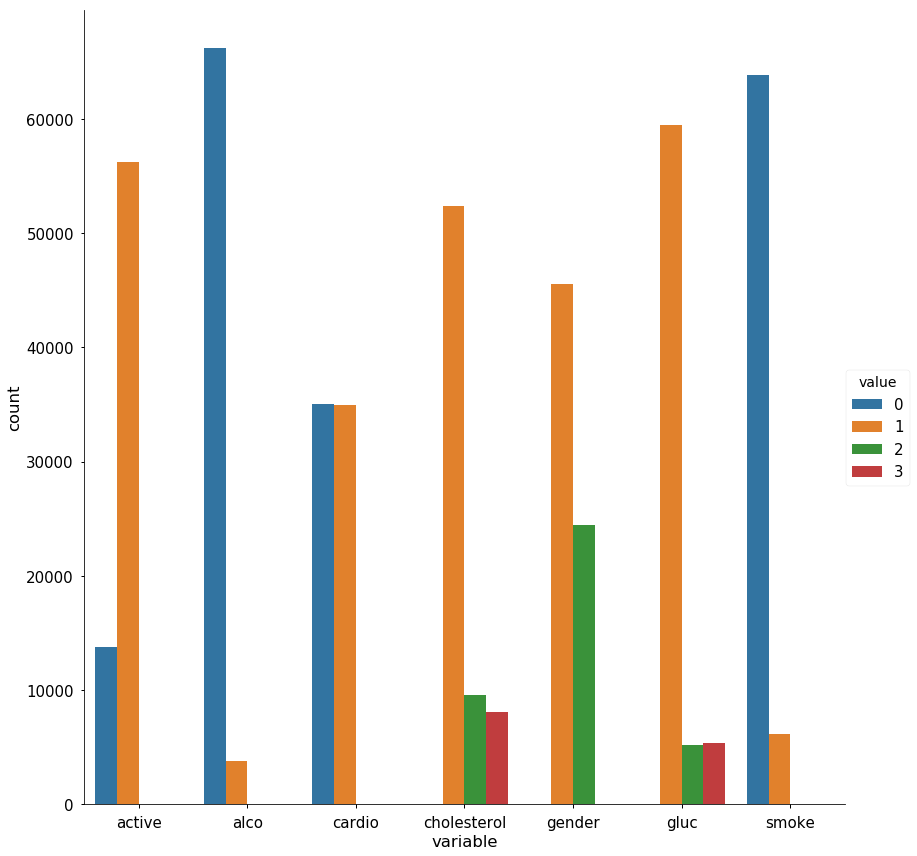

In [146]:
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 
                                                    'value'])['value'].count()) \
    .sort_index(level=[0]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               data=train_uniques, kind='bar', size=12);

Видим, что классы целевой переменной `cardio` сбалансированы, отлично!

Можно также разбить элементы обучающей выборки по значениям целевой переменной: иногда на таких графиках можно сразу увидеть самый значимый признак.

In [147]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active'], 
                        id_vars=['cardio'])

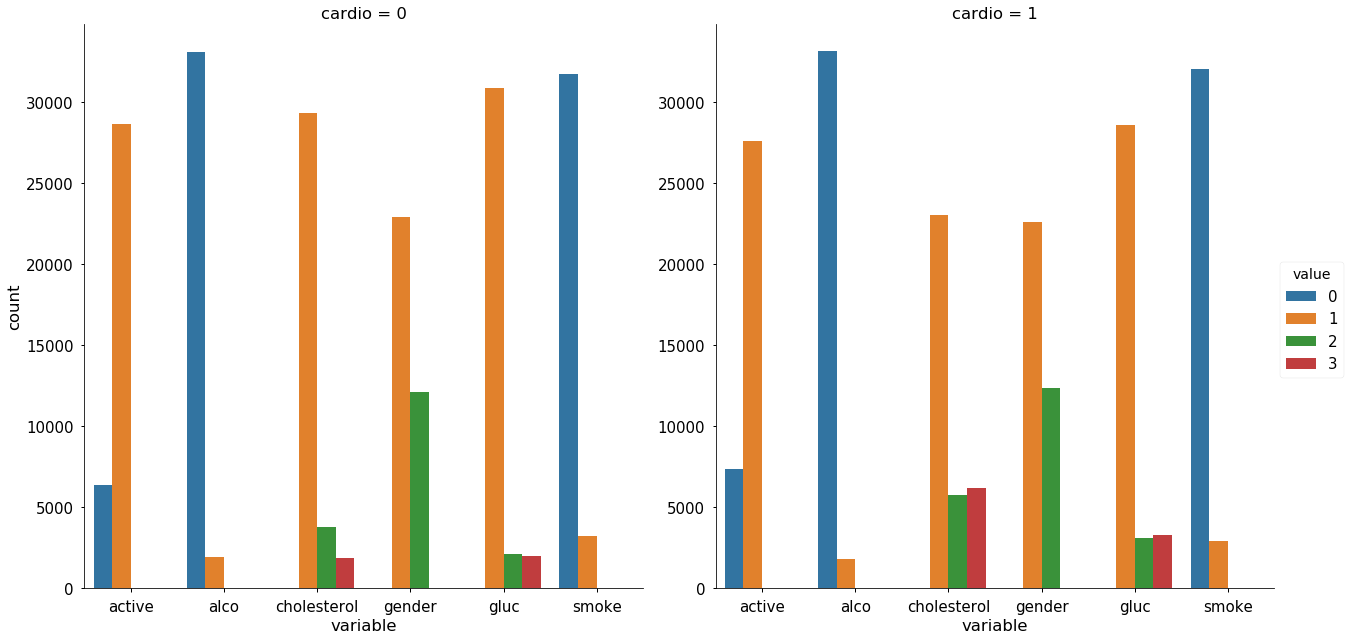

In [143]:
train_uniques = pd.melt(frame=train, value_vars=['gender','cholesterol', 
                                                 'gluc', 'smoke', 'alco', 
                                                 'active'], 
                        id_vars=['cardio'])
train_uniques = pd.DataFrame(train_uniques.groupby(['variable', 'value', 
                                                    'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()
    
sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=train_uniques, kind='bar', size=9);

Видим, что в зависимости от целевой переменной сильно меняется распределение холестерина и глюкозы. Совпадение?

**Немного статистики по уникальным значениям признаков.**

In [6]:
for c in train.columns:
    n = train[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(train[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


*Итого:*
- Пять количественных признаков (без id)
- Семь категориальных
- 70000 объектов

---

# 1. Визуализируем корреляционную матрицу

Для того чтобы лучше понять признаки в датасете, можно посчитать матрицу коэффициентов корреляции между признаками. <br>

Постройте [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) корреляционной матрицы. Матрица формируется средствами `Pandas`, со стандартным значением параметров.

###  1. Какие два признака больше всего коррелируют (по Пирсону) с признаком `height` ?

- Gluc, Cholesterol
- Weight, Alco
- Smoke, Alco
- <b>Weight, Gender

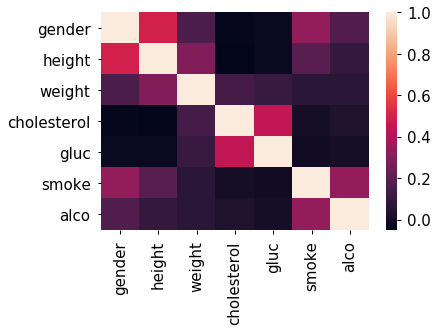

In [156]:
# Ваш код здесь
sns.heatmap(train.drop(['age','ap_hi','ap_lo','cardio','active'], axis=1).corr())

---

# 2. Распределение роста для мужчин и женщин

Как мы увидели, в процессе исследования уникальных значений пол кодируется значениями 1 и 2, расшифровка изначально не была нам дана в описании данных, но мы догадались, кто есть кто, посчитав средние значения роста (или веса) при разных значениях признака `gender`. Теперь сделаем то же самое, но графически. 

Постройте [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) для роста и пола. Используйте:
- hue – для разбивки по полу
- scale – для оценки количества каждого из полов 

Для корректной отрисовки, преобразуйте DataFrame в "Long Format"-представление с помощью функции melt в pandas.
<br>
[еще один пример](https://stackoverflow.com/a/41575149/3338479)

In [175]:
df1 = pd.melt(frame=train, value_vars=['gender'], id_vars='height')
df1.head()

,height,variable,value
0,168,gender,2
1,156,gender,1
2,165,gender,1
3,169,gender,2
4,156,gender,1


In [223]:
df2 = pd.melt(frame=train, value_vars=['height', 'weight'], id_vars='gender')
df2 = pd.melt(frame=train, value_vars=['height'], id_vars='gender')
df2.head()

,gender,variable,value
0,2,height,168
1,1,height,156
2,1,height,165
3,2,height,169
4,1,height,156


In [182]:
train[train.gender == 1].shape

(45530, 12)

In [183]:
train[train.gender == 2].shape

(24470, 12)

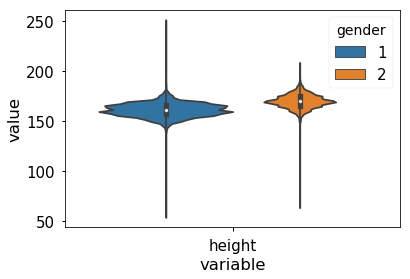

In [227]:
#правильный
sns.violinplot(x='variable', y='value', hue='gender', data=df2, scale='count')

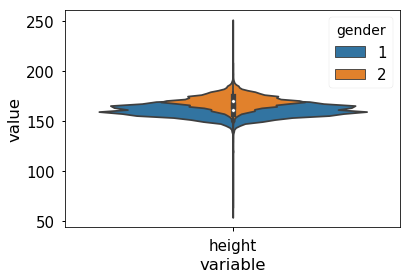

In [226]:
sns.violinplot(x='variable', y='value', hue='gender', data=df2, scale='count', dodge=False)

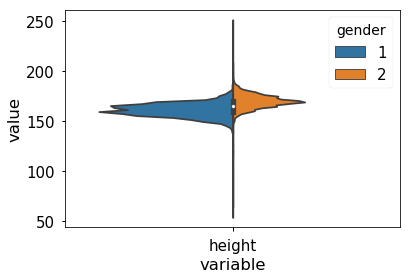

In [224]:
sns.violinplot(x='variable', y='value', hue='gender', data=df2, scale='count', dodge=False, split=True)

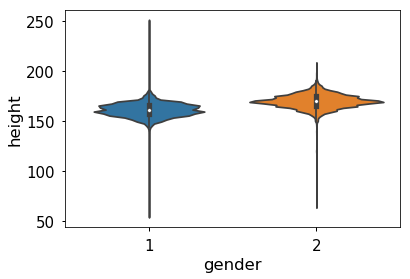

In [163]:
sns.violinplot(x='gender', y='height', data=train)

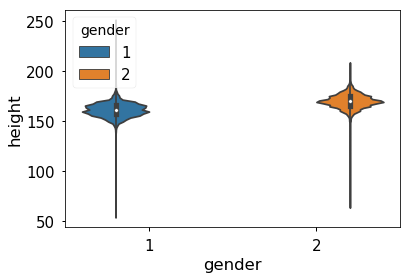

In [162]:
# Ваш код здесь
sns.violinplot(x='gender', hue='gender', y='height', data=train)

Постройте на одном графике два отдельных [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) роста, отдельно для мужчин и женщин. На нем разница будет более наглядной, но нельзя будет оценить количество мужчин/женщин.

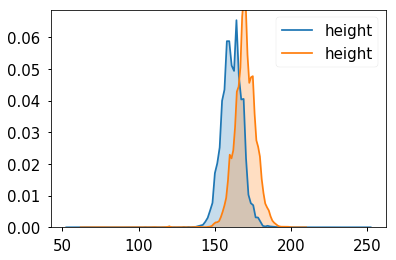

In [202]:
# Ваш код здесь
sns.kdeplot(data=train[train.gender == 1]['height'], shade=True)
sns.kdeplot(data=train[train.gender == 2]['height'], shade=True)

---

# 3. Ранговая корреляция

В большинстве случаев достаточно воспользоваться линейным коэффициентом корреляции *Пирсона* для выявления закономерностей в данных, но мы пойдём чуть дальше и используем ранговую корреляцию, которая поможет нам выявить пары, в которых меньший ранг из вариационного ряда одного признака всегда предшествует большему другого (или наоборот, в случае отрицательной корреляции).

##### Постройте корреляционную матрицу, используя коэффициент Спирмена

### 3.1 Какие признаки теперь больше всего коррелируют (по Спирмену) друг с другом?

- Height, Weight
- Age, Weight
- <b>Ap_hi, Ap_lo</b>
- Cholesterol, Gluc
- Cardio, Cholesterol
- Smoke, Alco

In [217]:
# Ваш код здесь
train.corr(method='spearman').ix['height','weight']

0.31356926989984962

In [219]:
train.corr(method='spearman').ix['ap_hi','ap_lo']

0.73543610513797775

In [220]:
train.corr(method='spearman').ix['cholesterol','gluc']

0.40780334258686346

In [221]:
train.corr(method='spearman').ix['cardio','cholesterol']

0.21511719895015893

In [222]:
train.corr(method='spearman').ix['smoke','alco']

0.34009376786968865

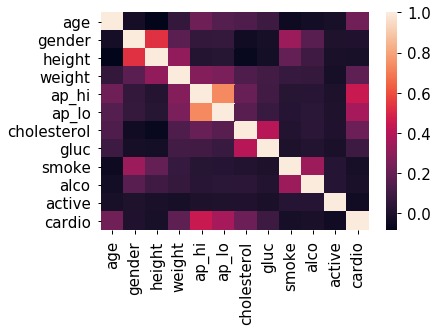

In [218]:
sns.heatmap(train.corr(method='spearman'))

### 3.2 Почему мы получили такое большое (относительно) значение ранговой корреляции у этих признаков?

- Неточности в данных (ошибки при сборе данных)
- Связь ошибочна, переменные никак не должны быть связаны друг с другом
- <b>Природа данных</b>

---

# 4. Совместное распределение признаков

Постройте совместный график распределения [jointplot](http://seaborn.pydata.org/generated/seaborn.jointplot.html) двух наиболее коррелирующих между собой признаков (по Спирмену).

Кажется, наш график получился неинформативным из-за выбросов в значениях. Постройте тот же график, но с логарифмической шкалой (чтобы не получать OverflowError необходимо отфильтровать значения меньше либо равные нулю).

In [ ]:
train_log = np.logspace(0,)

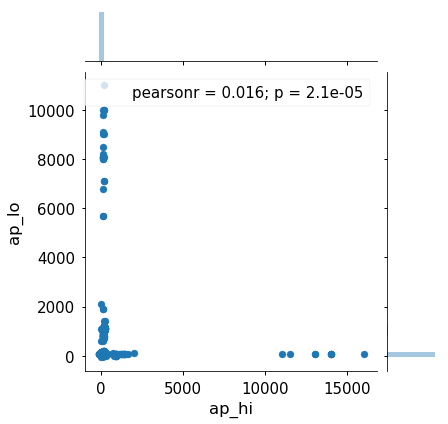

In [236]:
# Ваш код здесь
g = sns.jointplot(x='ap_hi', y='ap_lo', data=train)
# -------------------- #

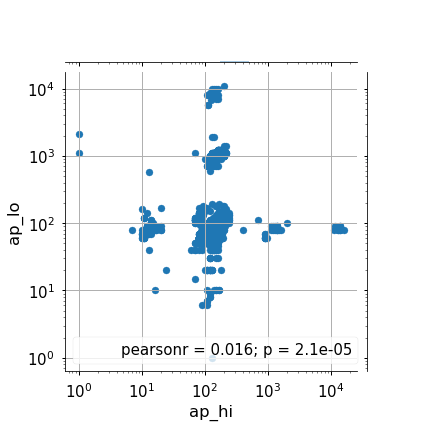

In [13]:
"""Сетка"""

g = sns.jointplot(x='ap_hi', y='ap_lo', data=train)

g.ax_joint.grid(True)
ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
# g.fig.get_axes()[0].set_yscale('log')
# g.fig.get_axes()[1].set_xscale('log')

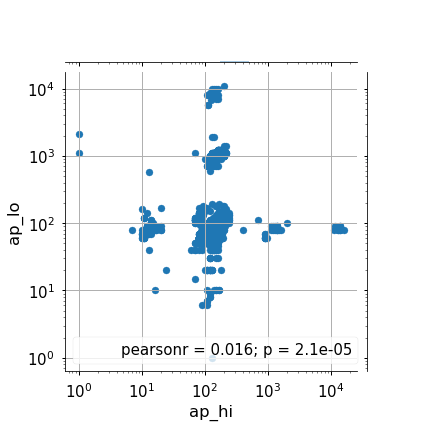

In [252]:
g = sns.jointplot(x='ap_hi', y='ap_lo', data=train)

g.ax_joint.grid(True)
g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')

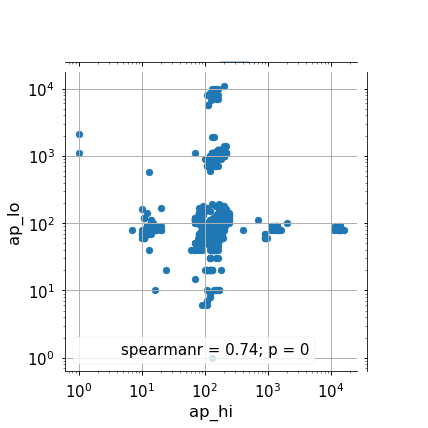

In [15]:
g = sns.jointplot(x='ap_hi', y='ap_lo', data=train, stat_func=spearmanr)

g.ax_joint.grid(True)
# ax = g.ax_joint
# ax.set_xscale('log')
# ax.set_yscale('log')
g.fig.get_axes()[0].set_yscale('log')
g.fig.get_axes()[1].set_xscale('log')

In [243]:
"""Преобразуем логарифмические значения на шкалах в реальные"""
g = sns.jointplot(x='ap_hi', y='ap_lo', data=train)

g.ax_joint.grid(True) 


g.ax_joint.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))
g.ax_joint.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000002156A0FDD08> (for post_execute):


OverflowError: cannot convert float infinity to integer

OverflowError: cannot convert float infinity to integer

In [5]:
train = train[(train['ap_hi'] > 0) & (train['ap_lo'] > 0)] 
train['ap_hi'] = np.log(train['ap_hi']) 
train['ap_lo'] = np.log(train['ap_lo']) 
train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,4.700480,4.382027,1,1,0,0,1,0
1,20228,1,156,85.0,4.941642,4.499810,3,1,0,0,1,1
2,18857,1,165,64.0,4.867534,4.248495,3,1,0,0,0,1
3,17623,2,169,82.0,5.010635,4.605170,1,1,0,0,1,1
4,17474,1,156,56.0,4.605170,4.094345,1,1,0,0,0,0


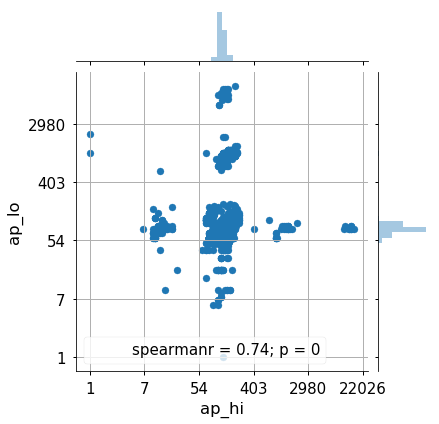

In [6]:
from scipy.stats import spearmanr
g = sns.jointplot( x=train['ap_hi'], y=train['ap_lo'] , stat_func=spearmanr) 

g.ax_joint.grid(True) 

"""Преобразуем логарифмические значения на шкалах в реальные""" 
g.ax_joint.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x)))))) 
g.ax_joint.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: str(round(int(np.exp(x))))))

### 4.1 Сколько чётко выраженных кластеров получилось на  совместном графике выбранных признаков, с логарифмической шкалой? Под кластером в данной задаче понимается плотное скопление точек, в окрестности которого пренебрежительно мало одиночных наблюдений и которое визуально отделимо от других кластеров.

- 1
- 2
- 3
- <b>больше трёх

In [ ]:
# Ваш код здесь

---

# 5. Возраст

Посчитаем, сколько полных лет было респондентам на момент их занесения в базу.

In [253]:
train['age_years'] = (train['age'] // 365.25).astype(int)

Постройте [Countplot](http://seaborn.pydata.org/generated/seaborn.countplot.html), где на оси абсцисс будет отмечен возраст, на оси ординат – количество. Каждое значение возраста должно иметь два столбца, соответствующих количеству человек каждого класса **cardio** (здоров/болен) данного возраста.

### 5. В каком возрасте количество пациентов с ССЗ  впервые становится больше, чем здоровых?
- 44
- 49
- <b>53</b>
- 62

In [259]:
# Ваш код здесь
df = pd.melt(train, value_vars=['age_years'])

In [260]:
df.head()

,variable,value
0,age_years,50
1,age_years,55
2,age_years,51
3,age_years,48
4,age_years,47


In [279]:
df = pd.DataFrame(train.groupby(['age_years'])['age_years'].count()) \
        .rename(columns={'age_years':'count'})

In [281]:
df = df.reset_index()

In [282]:
df.head()

,age_years,count
0,29,3
1,30,1
2,39,1880
3,40,1524
4,41,2004


In [300]:
sns.set_context(
    "notebook", 
    font_scale = 1,       
    rc = { 
        "figure.figsize" : (12, 9), 
        "axes.titlesize" : 18 
    }
)

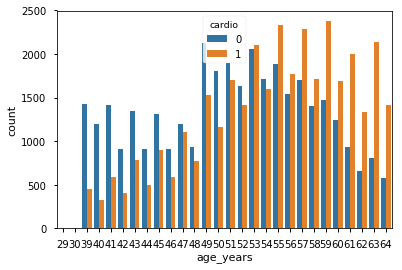

In [301]:
sns.countplot(x='age_years', hue='cardio', data=train)